# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [3]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

from loguru import logger

In [150]:
# Algumas configurações para o matplotlib.
from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()

In [5]:
fifa = pd.read_csv("fifa.csv")

In [6]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

In [7]:
df = fifa.copy()

## Inicia sua análise a partir daqui

In [8]:
# Sua análise começa aqui.
df.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [18]:
df.shape

(18207, 37)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 37 columns):
Age                18207 non-null int64
Overall            18207 non-null int64
Potential          18207 non-null int64
Crossing           18159 non-null float64
Finishing          18159 non-null float64
HeadingAccuracy    18159 non-null float64
ShortPassing       18159 non-null float64
Volleys            18159 non-null float64
Dribbling          18159 non-null float64
Curve              18159 non-null float64
FKAccuracy         18159 non-null float64
LongPassing        18159 non-null float64
BallControl        18159 non-null float64
Acceleration       18159 non-null float64
SprintSpeed        18159 non-null float64
Agility            18159 non-null float64
Reactions          18159 non-null float64
Balance            18159 non-null float64
ShotPower          18159 non-null float64
Jumping            18159 non-null float64
Stamina            18159 non-null float64
Strength       

In [10]:
pd.DataFrame({
'unique': df.nunique(),
'nan':df.isnull().sum()
})

,unique,nan
Age,29,0
Overall,48,0
Potential,47,0
Crossing,89,48
Finishing,93,48
HeadingAccuracy,91,48
ShortPassing,85,48
Volleys,87,48
Dribbling,94,48
Curve,89,48


In [11]:
df.dropna(axis=0, inplace=True) ## Number of missing values is very small - in this case is not worth treating since it seems that 48 athletes dont't have their  fifa profile filled out  

df.shape

(18159, 37)

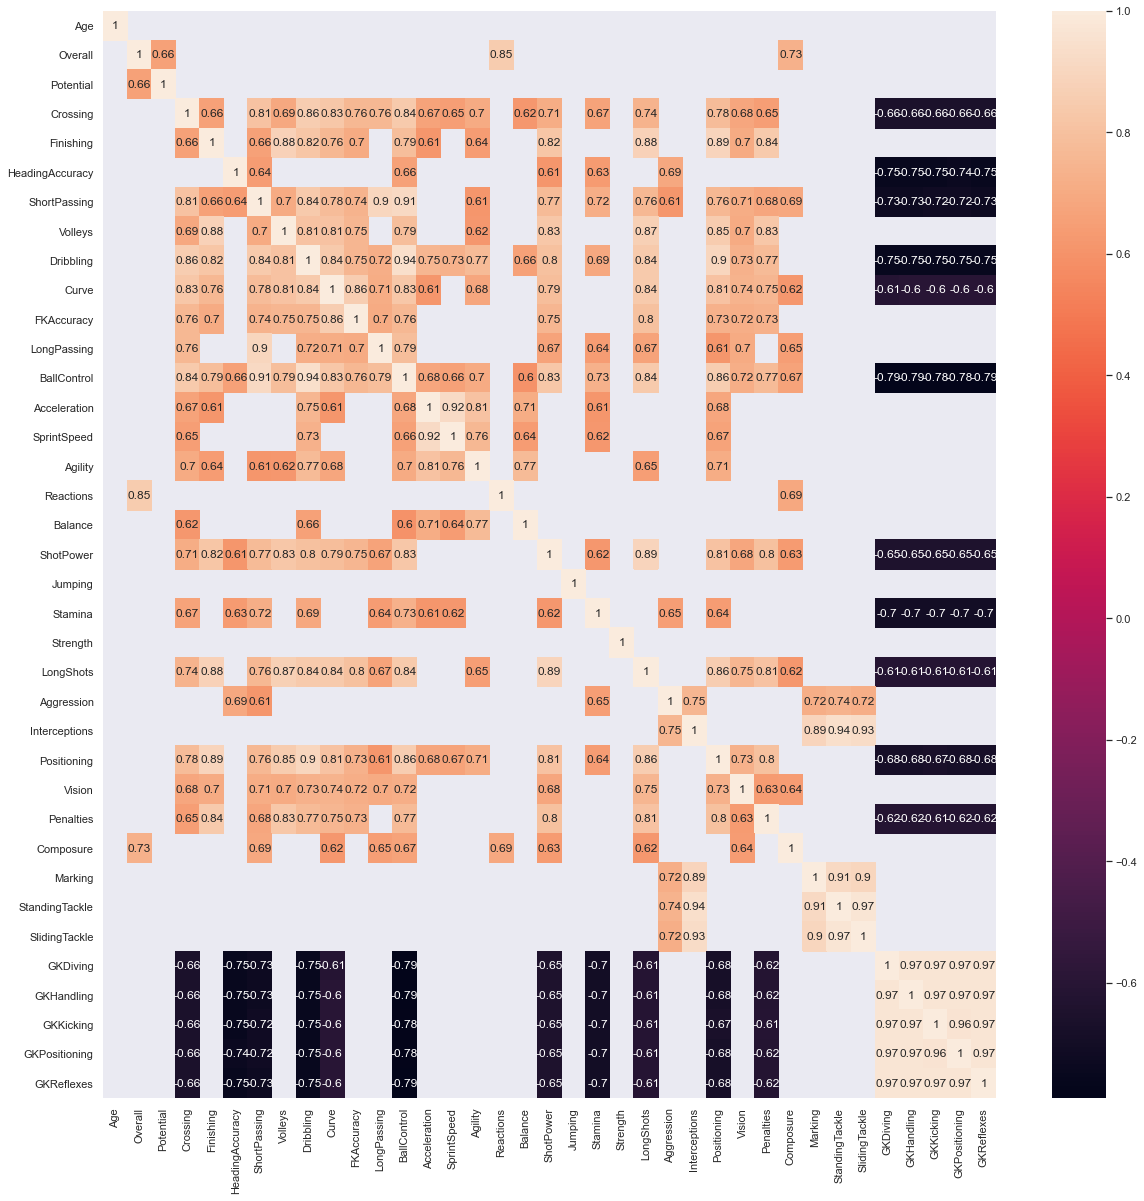

In [31]:
plt.figure(figsize = (20,20))
data = df.corr()
sns.heatmap(data[(data>0.6) | (data<-0.6)].round(2), annot= True)

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [12]:
def q1():
    pc1 = PCA(n_components=1).fit(df)
    pc1_var =  pc1.explained_variance_ratio_
    return pc1_var.round(3).item()

q1()

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

15

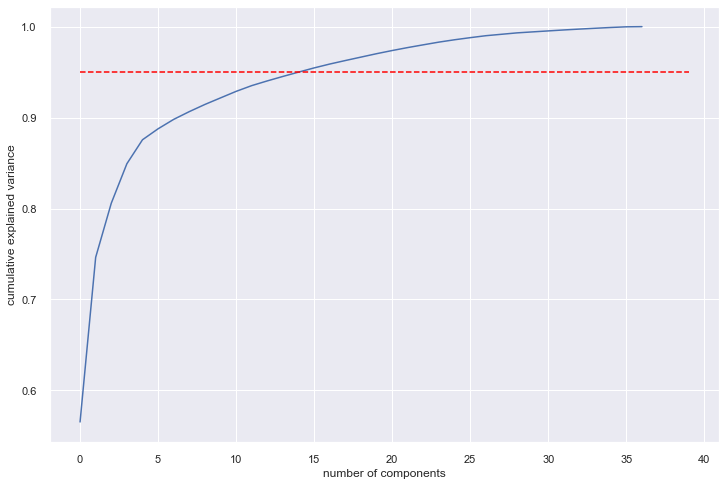

In [158]:
def q2():
    pca = PCA().fit(df)
    explained_var_ratio = pca.explained_variance_ratio_
    plt.plot(np.cumsum(explained_var_ratio))
    plt.plot(np.linspace(0.95,0.95,40), ls="--", color="red")
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')

    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    n_components95 = len(cumulative_variance_ratio[cumulative_variance_ratio<=0.95]) + 1
    
    return n_components95

q2()

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [152]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

$Z_{i}$ é um vetor com as coordenadas transformadas para $i=1, \cdots, d$ sendo $d$ o número de dimensões para o qual queremos redizir nosso datasset. Veja que para a componente 1, teremos $Z_{1} = [z_{11}, z_{21}, \cdots, z_{n1}]^{T}$ ou

$$Z_{1} = \begin{bmatrix} z_{11} \\ z_{21} \\ z_{31} \\ \vdots \\ z_{n1} \end{bmatrix}$$

$$Z_{1} = \phi_{11}X_{1} + \phi_{21}X_{2} + \cdots + \phi_{p1}X_{p} = \sum_{1 \leq j \leq p} \phi_{j1}X_{j}$$

onde $X_{i}$ é o vetor da feature $i$, contendo todas as observações!

Considerando o nosso dataframe!

```df.shape``` = (18159, 37), considerando ```df.dropna()```

Portanto, $p = 37$ features e $n = 18159$ observações

Queremos reduzir nosso dataset para $d=2$, as 2 principais componentes. Portanto,
``` 
pca = PCA(n_components = 2)
pca.fit(df)
```
Neste nosso caso teremos somente 2 vetores, $Z_{1} = [z_{11}, z_{21}, z_{31}, \cdots, z_{n1}]^{T}$ e também $Z_{2} = [z_{12}, z_{22}, z_{32}, \cdots, z_{n2}]^{T}$

Onde cada elemento dos vetores $Z_{1}$ e $Z_{2}$ serão, respectivamente, para $1 \leq i \leq n$. Onde cada elemento é resultado da combinação linear de todas as features de uma observação, por isso o vetor $Z_{1}$ é $[n \times 1]$

$$z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + \cdots + \phi_{p1} x_{ip} = \sum_{1 \leq j \leq p} \phi_{j1} x_{ij}$$
$$z_{i2} = \phi_{11}x_{i2} + \phi_{22}x_{i2} + \cdots + \phi_{p2} x_{ip} = \sum_{1 \leq j \leq p} \phi_{j2} x_{ij}$$

A matriz $\phi$ será portanto $[37 \times 2]$,
$$ \Phi = \begin{bmatrix} \phi_{11} & \phi_{12} \\ \phi_{21} & \phi_{22} \\ \phi_{31} & \phi_{32}  \\ \vdots & \vdots \\ \phi_{p1} & \phi_{p2} \end{bmatrix} $$

Sendo que conhecemos a observação $x_{i}$ e obtemos $\Phi$ através de ```pca.components_ ```, ou seja, queremos encontrar o elemento $z_{i1}$ de $Z_1$ e $z_{i2}$ de $Z_2$.

$$z_{i1} = \phi_1 \cdot x_{i} = \phi_1^T x_{i}$$
$$z_{i2} = \phi_2 \cdot x_{i} = \phi_2^T x_{i}$$


In [155]:
def q3():
    pca = PCA(n_components = 2)
    pca.fit(df) #instanciate object
    #get 2 vector of principal components loadings
    matrix_phi = pca.components_ # Matrix of vector loadings n_features x n_selected_components [37x2]
    #transform vector x
    x_pc_components = np.matmul(matrix_phi,np.asarray(x))
    print(x_pc_components)
    return tuple(x_pc_components.round(3))
   
q3()

[186.55588031  -6.59243177]


(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [147]:
 ''''backward stepwise selection = RFE

the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

First, the estimator is trained on the initial set of features and the importance of each feature is obtained. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
    estimator : A supervised learning estimator with a fit method that provides information about feature importance either through a coef_ attribute or   through a feature_importances_ attribute.

    n_features_to_select : The number of features to select. If None, half of the features are selected.

    step : If greater than or equal to 1, then step corresponds to the (integer) number of features to remove at each iteration. If within (0.0, 1.0), then step corresponds to the percentage (rounded down) of features to remove at each iteration.


'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error as mse

In [148]:
def q4():
    X = df.copy().drop(columns = ["Overall"])
    y = df["Overall"]

    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, shuffle = True)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    print("Model r2 score Linear regression:", reg.score(X_test, y_test))
    y_pred = reg.predict(X_test)
    print( 'MSE',  mse(y_test, y_pred))
    print('RMSE',  mse(y_test, y_pred, squared=False))
    print(pd.DataFrame.from_dict(dict(zip(X_train.columns, reg.coef_)), orient='index', columns=['coef']).sort_values(by='coef', ascending=False).head(5))

    selector = RFE(estimator = reg, n_features_to_select=5, step=1, verbose = 0)
    selector = selector.fit(X_train, y_train)
    selected_features5 = list(X_train.columns[selector.get_support()])
    print('\nMost important features RFE',selected_features5)
    print("\nModel r2 score RFE Linear regression selected features:", selector.score(X_test, y_test))
    y_pred = selector.predict(X_test)
    print( 'MSE',  mse(y_test, y_pred))
    print('RMSE',  mse(y_test, y_pred, squared=False))

    X_train5 = selector.transform(X_train)
    reg.fit(X_train5, y_train)
    coeficients = reg.coef_ 
    print(pd.DataFrame.from_dict(dict(zip(selected_features5, reg.coef_)), orient='index', columns=['coef']).sort_values(by='coef', ascending=False).head(5))
    
    # plt.scatter(y_test,y_pred)
    # plt.show()
    return selected_features5

q4()

Model r2 score Linear regression: 0.9249952598239307
MSE 3.5812185232554774
RMSE 1.8924107702228599
                 coef
Potential    0.523902
Age          0.511816
Reactions    0.155202
BallControl  0.082820
GKReflexes   0.051816

Most important features RFE ['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']

Model r2 score RFE Linear regression selected features: 0.8995974200316414
MSE 4.793878071189508
RMSE 2.1894926515495565
                 coef
Age          0.643114
Potential    0.626050
Reactions    0.212223
BallControl  0.095433
GKReflexes   0.061327


['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']

In [149]:
df.columns

Index(['Age', 'Overall', 'Potential', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')